In [1]:
import numpy as np
import sympy as sp
from sympy import Symbol
from sympy import solve, Poly, Eq, Function, exp
import math
import matplotlib.pyplot as plt
from numpy.lib.scimath import sqrt as csqrt
from scipy.signal import find_peaks
from scipy.constants import lambda2nu, nu2lambda, c
import os
import imp
import matplotlib.pyplot as plt
import sys
import scipy.io
import scipy.optimize
#windows path
#os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\') 
#lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py')

#linux path
sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
import lumapi
sys.path.append(os.path.dirname('/home/moises/Downloads/'))

## engine
#/opt/lumerical/v221/bin

In [8]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}

In [11]:
def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*np.pi)
    fitfunc = lambda t: A * np.sin(w*t + p) + c
    #return A
    return {"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": np.max(pcov), "rawres": (guess,popt,pcov)}

def linear(t,a,b):
    return a*t + b

In [24]:
inter = lumapi.INTERCONNECT(filename= 'hybrid_total.icp')

In [71]:
inter.switchtodesign()
#inter.set('Simulation', 'sample rate', 3e12)
inter.setnamed('::Root Element','sample rate', 5e12)

In [60]:
Result_IN = inter.getresult('OSC_1', 'signal')
Result_IP = inter.getresult('OSC_2', 'signal')
Result_QN = inter.getresult('OSC_3', 'signal')
Result_QP = inter.getresult('OSC_4', 'signal')
time = Result_IN['time']
IN_sampled = Result_IN['amplitude (a.u.)']
IP_sampled = Result_IP['amplitude (a.u.)']
QN_sampled = Result_QN['amplitude (a.u.)']
QP_sampled = Result_QP['amplitude (a.u.)']
t = np.ndarray.flatten(time)
IN = np.ndarray.flatten(IN_sampled)
IP = np.ndarray.flatten(IP_sampled)
QN = np.ndarray.flatten(QN_sampled)
QP = np.ndarray.flatten(QP_sampled)
c = 299792458

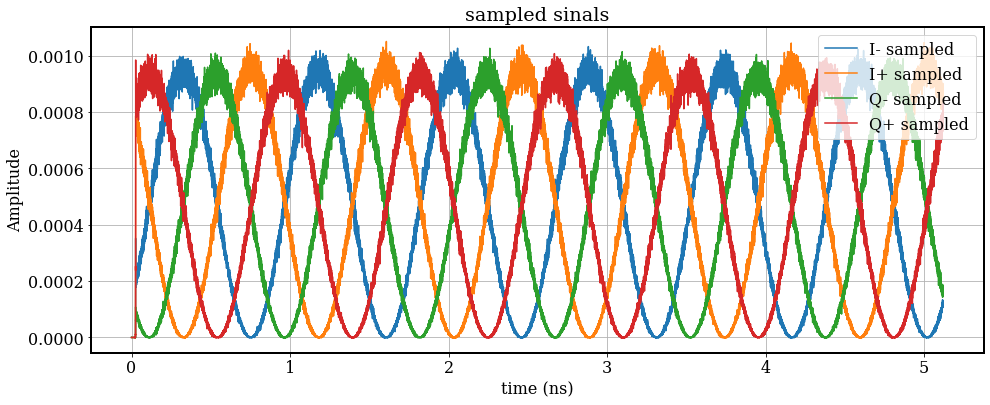

In [61]:
figure = plt.figure(figsize = (16, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(time*1e9, IN_sampled, label = 'I- sampled')
plt.plot(time*1e9, IP_sampled, label = 'I+ sampled')
plt.plot(time*1e9, QN_sampled, label = 'Q- sampled')
plt.plot(time*1e9, QP_sampled, label = 'Q+ sampled')
#plt.xlim([0, 1])
plt.grid(True)
plt.xlabel('time (ns)')
plt.ylabel('Amplitude')
plt.title('sampled sinals')
plt.legend(loc = 'upper right')

In [88]:
fit_IN = fit_sin(t, IN)
fit_IP = fit_sin(t, IP)
fit_QN = fit_sin(t, QN)
fit_QP = fit_sin(t, QP)

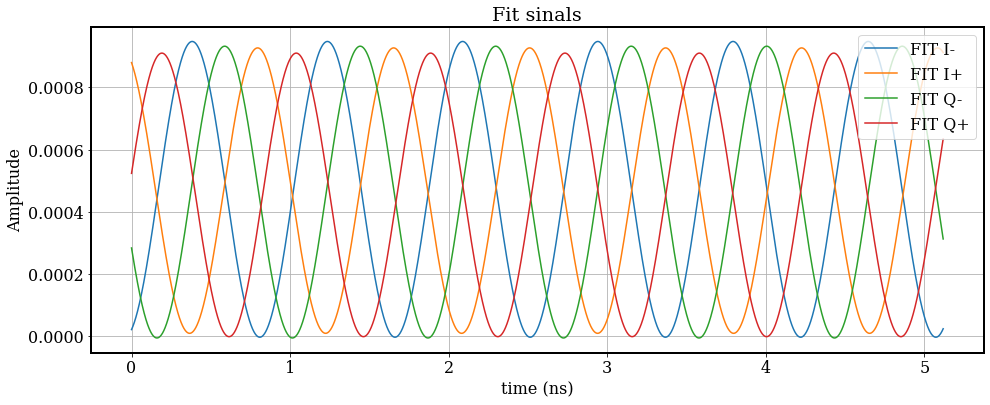

In [39]:
figure = plt.figure(figsize = (16, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(time*1e9, fit_IN['amp']*np.sin(2*np.pi*fit_IN['freq']*t+fit_IN['phase'])+fit_IN['offset'], label = 'FIT I-')
plt.plot(time*1e9, fit_IP['amp']*np.sin(2*np.pi*fit_IP['freq']*t+fit_IP['phase'])+fit_IP['offset'], label = 'FIT I+')
plt.plot(time*1e9, fit_QN['amp']*np.sin(2*np.pi*fit_QN['freq']*t+fit_QN['phase'])+fit_QN['offset'], label = 'FIT Q-')
plt.plot(time*1e9, fit_QP['amp']*np.sin(2*np.pi*fit_QP['freq']*t+fit_QP['phase'])+fit_QP['offset'], label = 'FIT Q+')
plt.grid(True)
plt.xlabel('time (ns)')
plt.ylabel('Amplitude')
plt.title('Fit sinals')
plt.legend(loc = 'upper right')01

passo 1 de 15
passo 2 de 15
passo 3 de 15
passo 4 de 15
passo 5 de 15
passo 6 de 15
passo 7 de 15
passo 8 de 15
passo 9 de 15
passo 10 de 15
passo 11 de 15
passo 12 de 15
passo 13 de 15
passo 14 de 15
passo 15 de 15
passo 16 de 15
passo 17 de 15
passo 18 de 15
passo 19 de 15
passo 20 de 15
passo 21 de 15
passo 22 de 15
passo 23 de 15
passo 24 de 15
passo 25 de 15
passo 26 de 15
passo 27 de 15
passo 28 de 15
passo 29 de 15
passo 30 de 15
passo 31 de 15
passo 32 de 15
passo 33 de 15
passo 34 de 15
passo 35 de 15
passo 36 de 15
passo 37 de 15
passo 38 de 15
passo 39 de 15
passo 40 de 15
passo 41 de 15
passo 42 de 15
passo 43 de 15
passo 44 de 15
passo 45 de 15
passo 46 de 15
passo 47 de 15
passo 48 de 15
passo 49 de 15
passo 50 de 15


Text(0, 0.5, 'phase difference (degree)')

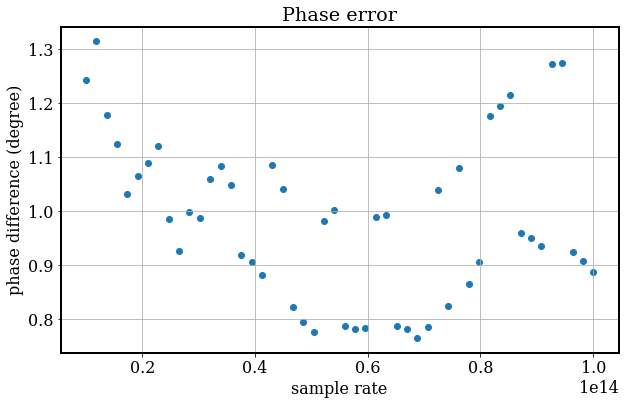

In [106]:
## convergence of the sample rate
freq = np.arange(1530e-9, 1565e-9, 1e-9)
sample_rate = np.linspace(10e12, 100e12, 50)
diff = 0.01e-9
phase_IN = np.zeros(len(sample_rate))
phase_QN = np.zeros(len(sample_rate))

for i in range(len(sample_rate)):
    print(f'passo {i+1} de 15')
    inter.switchtodesign()
    inter.setnamed('CWL_1', 'frequency', c/freq[0])
    inter.setnamed('CWL_2', 'frequency', c/(freq[0] + diff))
    inter.setnamed('::Root Element', 'sample rate', sample_rate[i])
    inter.run()

    Result_IN = inter.getresult('OSC_1', 'signal')
    Result_QN = inter.getresult('OSC_3', 'signal')
    
    IN_sampled = Result_IN['amplitude (a.u.)']
    QN_sampled = Result_QN['amplitude (a.u.)']
    IN = np.ndarray.flatten(IN_sampled)
    QN = np.ndarray.flatten(QN_sampled)
    time = Result_IN['time']
    t = np.ndarray.flatten(time)
    
    fit_IN = fit_sin(t, IN)
    fit_QN = fit_sin(t, QN)
    phase_IN[i] = fit_IN['phase']
    phase_QN[i] = fit_QN['phase']  

fig = plt.figure(figsize = (10, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.scatter(sample_rate, abs(90 - abs(phase_QN - phase_IN)*180/np.pi))
plt.grid(True)
plt.title('Phase error')
plt.xlabel('sample rate')
plt.ylabel('phase difference (degree)')

In [80]:
freq = np.arange(1530e-9, 1565e-9, 1e-9)
diff = 0.01e-9
phase_QP = np.zeros(len(freq))
phase_QN = np.zeros(len(freq))
phase_IP = np.zeros(len(freq))
phase_IN = np.zeros(len(freq))

for i in range(len(freq)):
    inter.switchtodesign()
    inter.setnamed('CWL_1', 'frequency', c/freq[i])
    inter.setnamed('CWL_2', 'frequency', c/(freq[i] + diff))
    inter.run()

    Result_IN = inter.getresult('OSC_1', 'signal')
    Result_IP = inter.getresult('OSC_2', 'signal')
    Result_QN = inter.getresult('OSC_3', 'signal')
    Result_QP = inter.getresult('OSC_4', 'signal')
    IN_sampled = Result_IN['amplitude (a.u.)']
    IP_sampled = Result_IP['amplitude (a.u.)']
    QN_sampled = Result_QN['amplitude (a.u.)']
    QP_sampled = Result_QP['amplitude (a.u.)']
    IN = np.ndarray.flatten(IN_sampled)
    IP = np.ndarray.flatten(IP_sampled)
    QN = np.ndarray.flatten(QN_sampled)
    QP = np.ndarray.flatten(QP_sampled)
    time = Result_IN['time']
    t = np.ndarray.flatten(time)
    
    fit_IN = fit_sin(t, IN)
    fit_IP = fit_sin(t, IP)
    fit_QN = fit_sin(t, QN)
    fit_QP = fit_sin(t, QP)

    phase_IN[i] = fit_IN['phase']
    phase_IP[i] = fit_IP['phase']
    phase_QN[i] = fit_QN['phase']
    phase_QP[i] = fit_QP['phase']    

KeyError: 'amplitude (a.u.)'

In [44]:
freq = np.arange(1530e-9, 1565e-9, 1e-9)
diff = 0.01e-9
phase_QP = np.zeros(len(freq))
phase_QN = np.zeros(len(freq))
phase_IP = np.zeros(len(freq))
phase_IN = np.zeros(len(freq))

for i in range(len(freq)):
    inter.switchtodesign()
    inter.setnamed('CWL_1', 'frequency', c/freq[i])
    inter.setnamed('CWL_2', 'frequency', c/(freq[i] + diff))
    inter.run()

    Result_IN = inter.getresult('OSC_1', 'signal')
    Result_IP = inter.getresult('OSC_2', 'signal')
    Result_QN = inter.getresult('OSC_3', 'signal')
    Result_QP = inter.getresult('OSC_4', 'signal')
    IN_sampled = Result_IN['amplitude (a.u.)']
    IP_sampled = Result_IP['amplitude (a.u.)']
    QN_sampled = Result_QN['amplitude (a.u.)']
    QP_sampled = Result_QP['amplitude (a.u.)']
    IN = np.ndarray.flatten(IN_sampled)
    IP = np.ndarray.flatten(IP_sampled)
    QN = np.ndarray.flatten(QN_sampled)
    QP = np.ndarray.flatten(QP_sampled)
    time = Result_IN['time']
    t = np.ndarray.flatten(time)
    
    fit_IN = fit_sin(t, IN)
    fit_IP = fit_sin(t, IP)
    fit_QN = fit_sin(t, QN)
    fit_QP = fit_sin(t, QP)

    phase_IN[i] = fit_IN['phase']
    phase_IP[i] = fit_IP['phase']
    phase_QN[i] = fit_QN['phase']
    phase_QP[i] = fit_QP['phase']    

Text(0, 0.5, 'phase error (degree)')

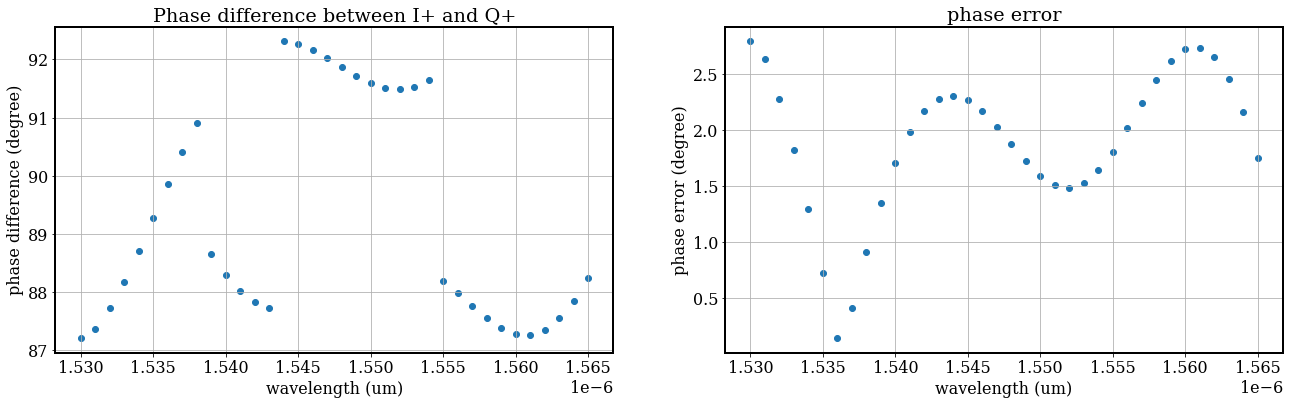

In [138]:
fig, ax = plt.subplots(1, 2, figsize = (22, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
ax[0].scatter(freq, abs(phase_QP - phase_IP)*180/np.pi)
ax[0].grid(True)
ax[0].set_title('Phase difference between I+ and Q+')
ax[0].set_xlabel('wavelength (um)')
ax[0].set_ylabel('phase difference (degree)')

ax[1].scatter(freq, abs(90 - abs(phase_QP - phase_IP)*180/np.pi))
ax[1].grid(True)
ax[1].set_title('phase error')
ax[1].set_xlabel('wavelength (um)')
ax[1].set_ylabel('phase error (degree)')

Text(0, 0.5, 'phase error (degree)')

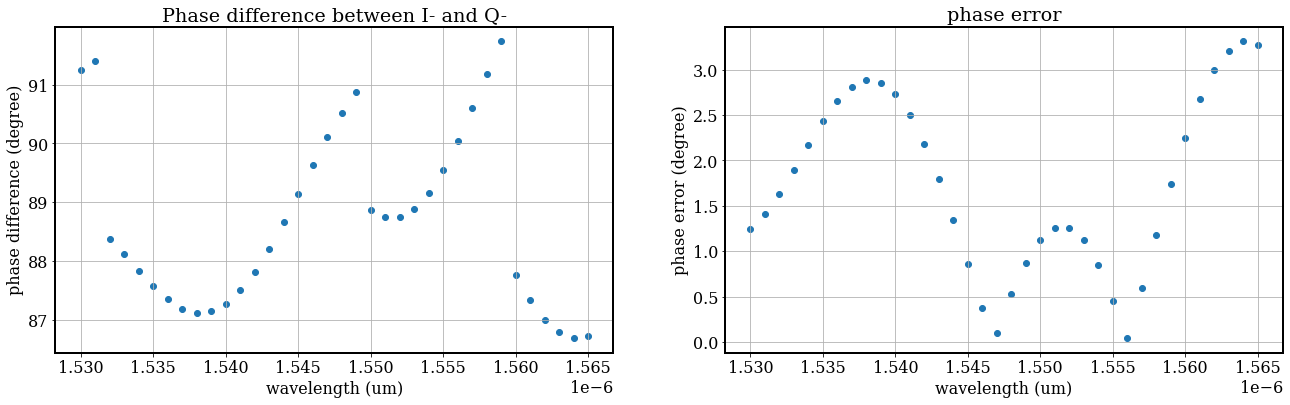

In [139]:
fig, ax = plt.subplots(1, 2, figsize = (22, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
ax[0].scatter(freq, abs(phase_QN - phase_IN)*180/np.pi)
ax[0].grid(True)
ax[0].set_title('Phase difference between I- and Q-')
ax[0].set_xlabel('wavelength (um)')
ax[0].set_ylabel('phase difference (degree)')

ax[1].scatter(freq, abs(90 - abs(phase_QN - phase_IN)*180/np.pi))
ax[1].grid(True)
ax[1].set_title('phase error')
ax[1].set_xlabel('wavelength (um)')
ax[1].set_ylabel('phase error (degree)')

## INCREASING THE SAMPLE RATE

Text(0, 0.5, 'phase error (degree)')

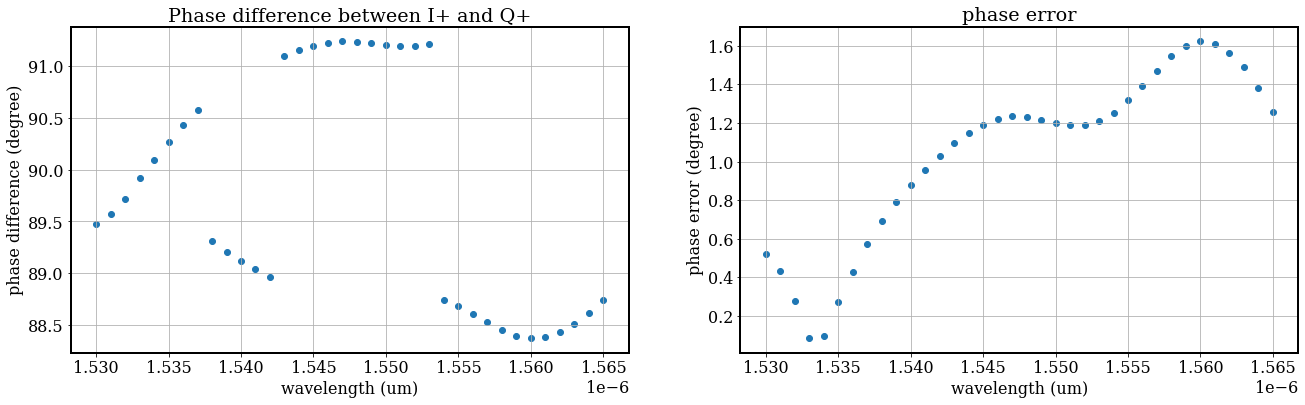

In [45]:
fig, ax = plt.subplots(1, 2, figsize = (22, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
ax[0].scatter(freq, abs(phase_QP - phase_IP)*180/np.pi)
ax[0].grid(True)
ax[0].set_title('Phase difference between I+ and Q+')
ax[0].set_xlabel('wavelength (um)')
ax[0].set_ylabel('phase difference (degree)')

ax[1].scatter(freq, abs(90 - abs(phase_QP - phase_IP)*180/np.pi))
ax[1].grid(True)
ax[1].set_title('phase error')
ax[1].set_xlabel('wavelength (um)')
ax[1].set_ylabel('phase error (degree)')

Text(0, 0.5, 'phase error (degree)')

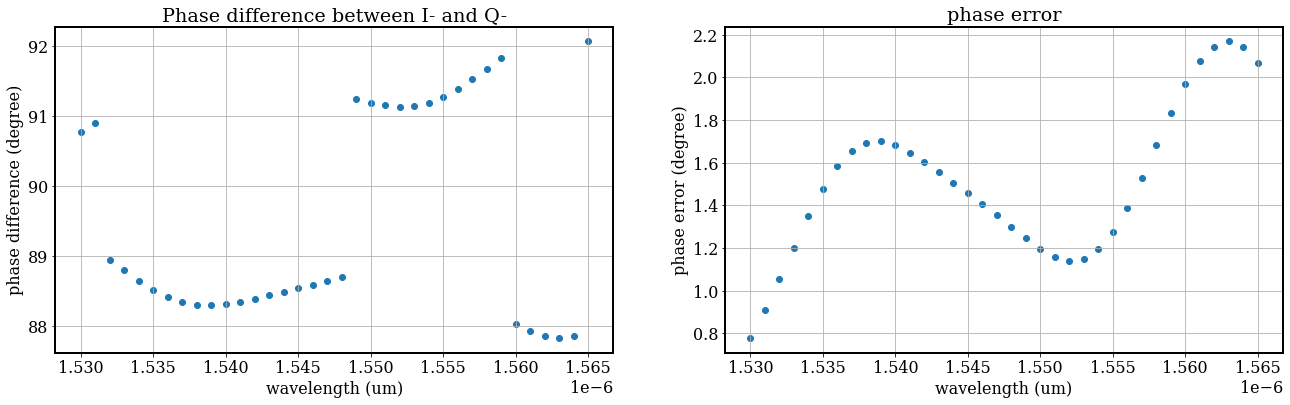

In [46]:
fig, ax = plt.subplots(1, 2, figsize = (22, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
ax[0].scatter(freq, abs(phase_QN - phase_IN)*180/np.pi)
ax[0].grid(True)
ax[0].set_title('Phase difference between I- and Q-')
ax[0].set_xlabel('wavelength (um)')
ax[0].set_ylabel('phase difference (degree)')

ax[1].scatter(freq, abs(90 - abs(phase_QN - phase_IN)*180/np.pi))
ax[1].grid(True)
ax[1].set_title('phase error')
ax[1].set_xlabel('wavelength (um)')
ax[1].set_ylabel('phase error (degree)')

### BLOCKS SIMPLIFIED

In [27]:
icp = lumapi.INTERCONNECT(filename= 'hybrid.icp')

In [39]:
Result_IN = icp.getresult('OSC_1', 'signal')
Result_IP = icp.getresult('OSC_2', 'signal')
Result_QN = icp.getresult('OSC_3', 'signal')
Result_QP = icp.getresult('OSC_4', 'signal')
time = Result_IN['time']
IN_sampled = Result_IN['amplitude (a.u.)']
IP_sampled = Result_IP['amplitude (a.u.)']
QN_sampled = Result_QN['amplitude (a.u.)']
QP_sampled = Result_QP['amplitude (a.u.)']
t = np.ndarray.flatten(time)
IN = np.ndarray.flatten(IN_sampled)
IP = np.ndarray.flatten(IP_sampled)
QN = np.ndarray.flatten(QN_sampled)
QP = np.ndarray.flatten(QP_sampled)
c = 299792458

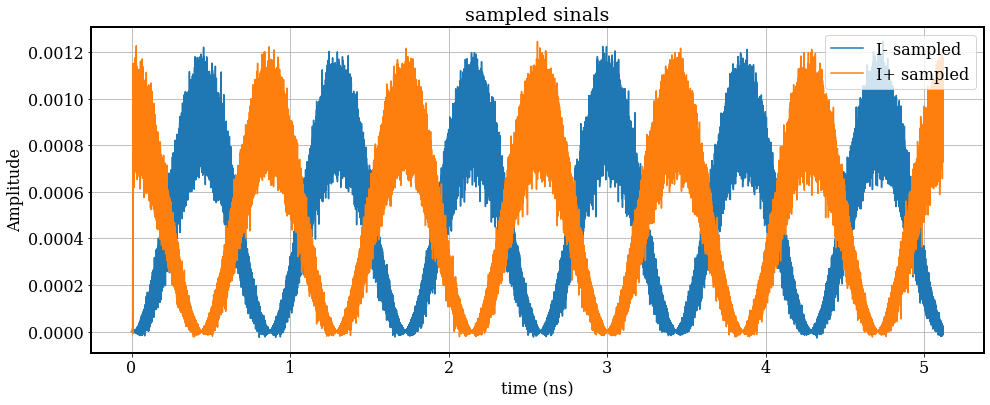

In [40]:
figure = plt.figure(figsize = (16, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(time*1e9, IN_sampled, label = 'I- sampled')
plt.plot(time*1e9, IP_sampled, label = 'I+ sampled')
#plt.plot(time*1e9, QN_sampled, label = 'Q- sampled')
#plt.plot(time*1e9, QP_sampled, label = 'Q+ sampled')
plt.grid(True)
plt.xlabel('time (ns)')
plt.ylabel('Amplitude')
plt.title('sampled sinals')
plt.legend(loc = 'upper right')

In [41]:
fit_IN = fit_sin(t, IN)
fit_IP = fit_sin(t, IP)
fit_QN = fit_sin(t, QN)
fit_QP = fit_sin(t, QP)

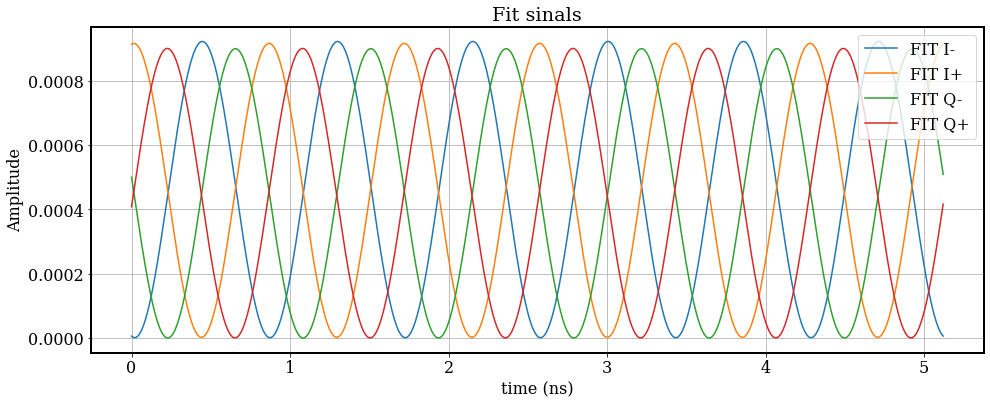

In [42]:
figure = plt.figure(figsize = (16, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.plot(time*1e9, fit_IN['amp']*np.sin(2*np.pi*fit_IN['freq']*t+fit_IN['phase'])+fit_IN['offset'], label = 'FIT I-')
plt.plot(time*1e9, fit_IP['amp']*np.sin(2*np.pi*fit_IP['freq']*t+fit_IP['phase'])+fit_IP['offset'], label = 'FIT I+')
plt.plot(time*1e9, fit_QN['amp']*np.sin(2*np.pi*fit_QN['freq']*t+fit_QN['phase'])+fit_QN['offset'], label = 'FIT Q-')
plt.plot(time*1e9, fit_QP['amp']*np.sin(2*np.pi*fit_QP['freq']*t+fit_QP['phase'])+fit_QP['offset'], label = 'FIT Q+')
plt.grid(True)
plt.xlabel('time (ns)')
plt.ylabel('Amplitude')
plt.title('Fit sinals')
plt.legend(loc = 'upper right')

In [43]:
freq = np.arange(1530e-9, 1565e-9, 1e-9)
diff = 0.01e-9
phase_QP = np.zeros(len(freq))
phase_QN = np.zeros(len(freq))
phase_IP = np.zeros(len(freq))
phase_IN = np.zeros(len(freq))

for i in range(len(freq)):
    icp.switchtodesign()
    icp.setnamed('CWL_1', 'frequency', c/freq[i])
    icp.setnamed('CWL_2', 'frequency', c/(freq[i] + diff))
    icp.run()

    Result_IN = icp.getresult('OSC_1', 'signal')
    Result_IP = icp.getresult('OSC_2', 'signal')
    Result_QN = icp.getresult('OSC_3', 'signal')
    Result_QP = icp.getresult('OSC_4', 'signal')
    IN_sampled = Result_IN['amplitude (a.u.)']
    IP_sampled = Result_IP['amplitude (a.u.)']
    QN_sampled = Result_QN['amplitude (a.u.)']
    QP_sampled = Result_QP['amplitude (a.u.)']
    IN = np.ndarray.flatten(IN_sampled)
    IP = np.ndarray.flatten(IP_sampled)
    QN = np.ndarray.flatten(QN_sampled)
    QP = np.ndarray.flatten(QP_sampled)
    time = Result_IN['time']
    t = np.ndarray.flatten(time)
    0
    fit_IN = fit_sin(t, IN)
    fit_IP = fit_sin(t, IP)
    fit_QN = fit_sin(t, QN)
    fit_QP = fit_sin(t, QP)

    phase_IN[i] = fit_IN['phase']
    phase_IP[i] = fit_IP['phase']
    phase_QN[i] = fit_QN['phase']
    phase_QP[i] = fit_QP['phase']    

KeyError: 'amplitude (a.u.)'

Text(0, 0.5, 'phase error (degree)')

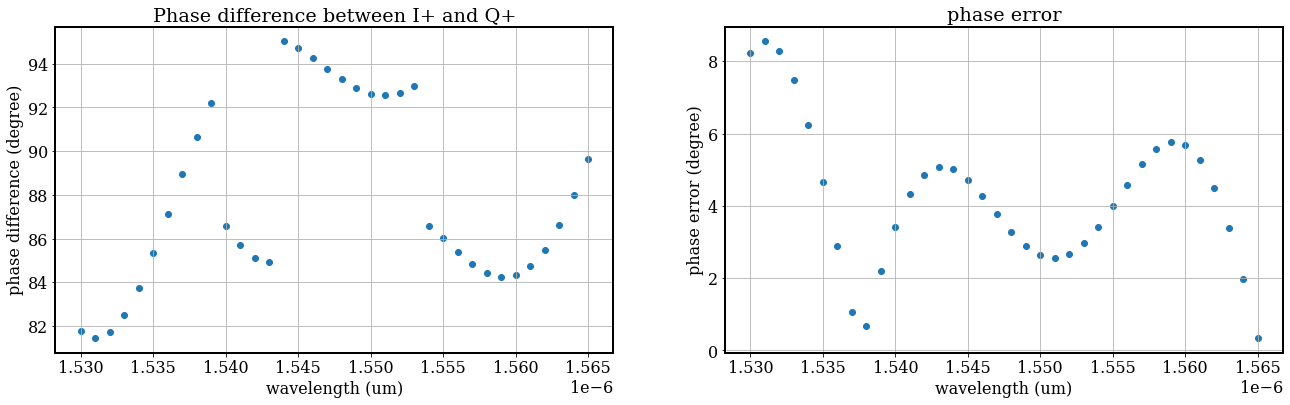

In [18]:
fig, ax = plt.subplots(1, 2, figsize = (22, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
ax[0].scatter(freq, abs(phase_QP - phase_IP)*180/np.pi)
ax[0].grid(True)
ax[0].set_title('Phase difference between I+ and Q+')
ax[0].set_xlabel('wavelength (um)')
ax[0].set_ylabel('phase difference (degree)')

ax[1].scatter(freq, abs(90 - abs(phase_QP - phase_IP)*180/np.pi))
ax[1].grid(True)
ax[1].set_title('phase error')
ax[1].set_xlabel('wavelength (um)')
ax[1].set_ylabel('phase error (degree)')

Text(0, 0.5, 'phase error (degree)')

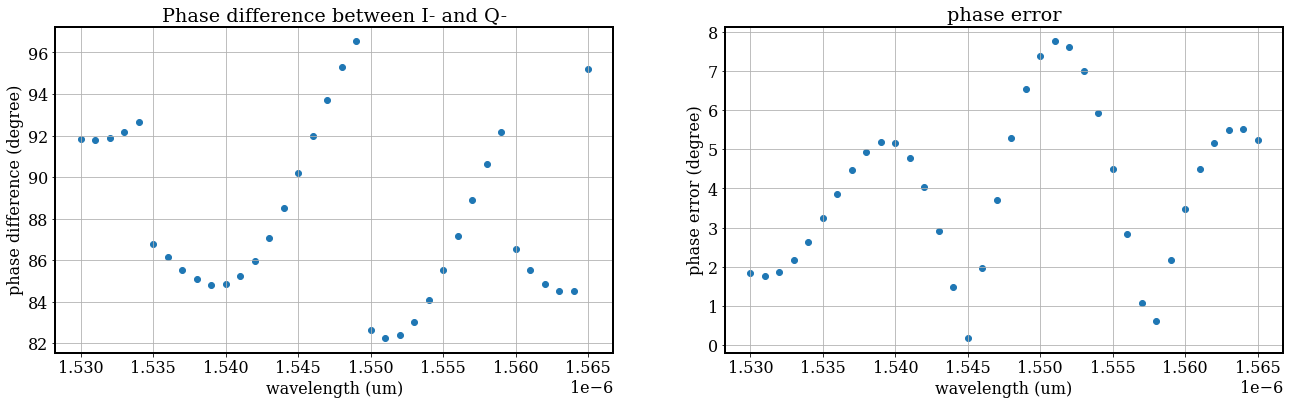

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (22, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
ax[0].scatter(freq, abs(phase_QN - phase_IN)*180/np.pi)
ax[0].grid(True)
ax[0].set_title('Phase difference between I- and Q-')
ax[0].set_xlabel('wavelength (um)')
ax[0].set_ylabel('phase difference (degree)')

ax[1].scatter(freq, abs(90 - abs(phase_QN - phase_IN)*180/np.pi))
ax[1].grid(True)
ax[1].set_title('phase error')
ax[1].set_xlabel('wavelength (um)')
ax[1].set_ylabel('phase error (degree)')

## increasing the sample rate

Text(0, 0.5, 'phase error (degree)')

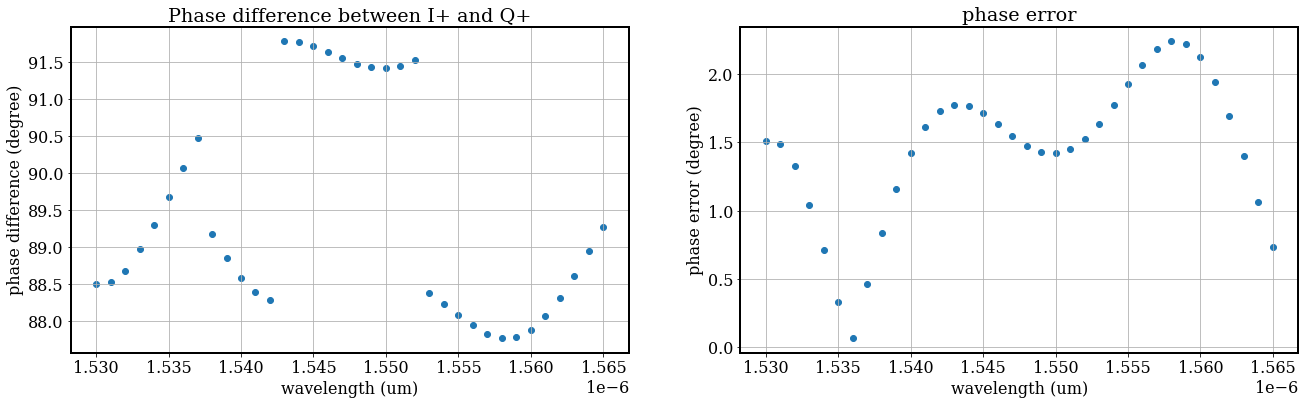

In [29]:
fig, ax = plt.subplots(1, 2, figsize = (22, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
ax[0].scatter(freq, abs(phase_QP - phase_IP)*180/np.pi)
ax[0].grid(True)
ax[0].set_title('Phase difference between I+ and Q+')
ax[0].set_xlabel('wavelength (um)')
ax[0].set_ylabel('phase difference (degree)')

ax[1].scatter(freq, abs(90 - abs(phase_QP - phase_IP)*180/np.pi))
ax[1].grid(True)
ax[1].set_title('phase error')
ax[1].set_xlabel('wavelength (um)')
ax[1].set_ylabel('phase error (degree)')

Text(0, 0.5, 'phase error (degree)')

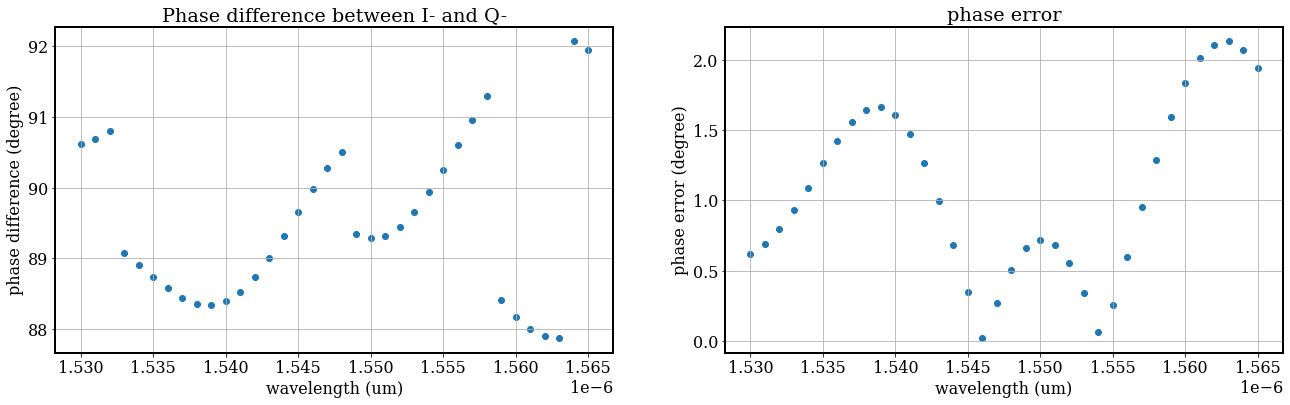

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (22, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
ax[0].scatter(freq, abs(phase_QN - phase_IN)*180/np.pi)
ax[0].grid(True)
ax[0].set_title('Phase difference between I- and Q-')
ax[0].set_xlabel('wavelength (um)')
ax[0].set_ylabel('phase difference (degree)')

ax[1].scatter(freq, abs(90 - abs(phase_QN - phase_IN)*180/np.pi))
ax[1].grid(True)
ax[1].set_title('phase error')
ax[1].set_xlabel('wavelength (um)')
ax[1].set_ylabel('phase error (degree)')

3.831213520766773e+23